# Модуль 1: Работа с пропущенными значениями


Пропущенные значения возникают, когда в таблице чего-то не хватает. Это мешает анализу данных и обучению моделей.

Варианты действий:

* Удалить строки с пропусками

* Заполнить средним/медианой/модой

* Заполнить специальным значением (например, "Неизвестно")


In [48]:
import pandas as pd
import seaborn as sns

In [49]:
df = sns.load_dataset("titanic") # загружает датасет
df.head(100)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,NaN,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.0,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.0,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.0,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False


## Задание 1.1: Найти количество пропущенных значений

In [50]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


## Задание 1.2: Заполнить пропущенные значения в колонке 'age' средним значением


In [51]:
df['age'].fillna(df['age'].mean(), inplace=True)
df.head(100)

/tmp/ipython-input-51-3666499256.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,3,male,29.699118,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
96,0,1,male,71.000000,0,0,34.6542,C,First,man,True,A,Cherbourg,no,True
97,1,1,male,23.000000,0,1,63.3583,C,First,man,True,D,Cherbourg,yes,False
98,1,2,female,34.000000,0,1,23.0000,S,Second,woman,False,NaN,Southampton,yes,False


Задание 1.3: Скопировать датафрейм и удалить строки с нулевыми значениями age

In [52]:
# Копируем датафрейм
df_copy = df.copy()

df_copy = df_copy[df_copy['age'].notnull()]  # убираем пропуски
df_copy = df_copy[df_copy['age'] > 0]        # убираем нули

print(df_copy.head(100))

    survived  pclass     sex        age  sibsp  parch     fare embarked  \
0          0       3    male  22.000000      1      0   7.2500        S   
1          1       1  female  38.000000      1      0  71.2833        C   
2          1       3  female  26.000000      0      0   7.9250        S   
3          1       1  female  35.000000      1      0  53.1000        S   
4          0       3    male  35.000000      0      0   8.0500        S   
..       ...     ...     ...        ...    ...    ...      ...      ...   
95         0       3    male  29.699118      0      0   8.0500        S   
96         0       1    male  71.000000      0      0  34.6542        C   
97         1       1    male  23.000000      0      1  63.3583        C   
98         1       2  female  34.000000      0      1  23.0000        S   
99         0       2    male  34.000000      1      0  26.0000        S   

     class    who  adult_male deck  embark_town alive  alone  
0    Third    man        True  NaN  

### Модуль 2: Очистка от выбросов

Выбросы — это очень необычные значения, сильно отличающиеся от остальных (например, вес человека 1000 кг).

Методы:

* Сравнение со средним ± 3σ

* Межквартильный размах (IQR)

* Визуализация: boxplot

In [53]:
import matplotlib.pyplot as plt

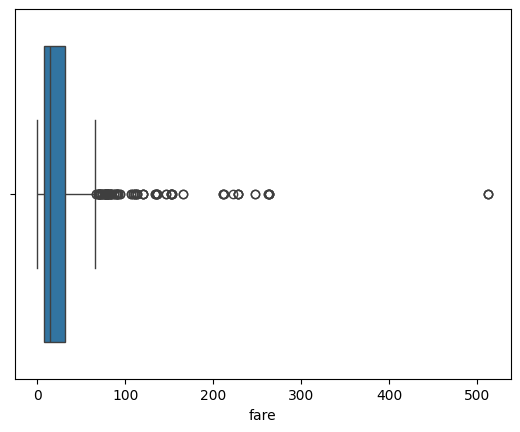

In [54]:
sns.boxplot(x=df['fare'])
plt.show()

## Задание 2.1: Найдите выбросы по методу IQR

In [55]:
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['fare'] < Q1 - 1.5 * IQR) | (df['fare'] > Q3 + 1.5 * IQR)]
outliers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1,0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000000,1,0,82.1708,C,First,man,True,NaN,Cherbourg,no,False
52,1,1,female,49.000000,1,0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
849,1,1,female,29.699118,1,0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.000000,1,1,164.8667,S,First,woman,False,NaN,Southampton,yes,False
863,0,3,female,29.699118,8,2,69.5500,S,Third,woman,False,NaN,Southampton,no,False


# Модуль 3: Нормализация данных

Нормализация — это приведение данных к одному масштабу (например, от 0 до 1). Важно при работе с алгоритмами машинного обучения.



In [56]:
from sklearn.preprocessing import MinMaxScaler

## Задание 3.1: Преобразуйте колонки 'age' и 'fare'

# Модуль 4: Кодирование категориальных признаков

Компьютер не понимает слова. Нужно заменить категории на числа:

* One-Hot Encoding (dummy-переменные)

* Label Encoding (просто номера)

## Задание 4.1: Преобразовать колонки 'sex' в числовые с помощью one-hot кодирования

In [57]:
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'])
df_encoded.head()

,survived,pclass,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,no,False,False,True,False,False,True
1,1,1,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,yes,False,True,False,True,False,False
2,1,3,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,yes,True,True,False,False,False,True
3,1,1,35.0,1,0,53.1000,First,woman,False,C,Southampton,yes,False,True,False,False,False,True
4,0,3,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,no,True,False,True,False,False,True


# Модуль 5: Удаление дубликатов

Иногда строки дублируются — это портит анализ.



In [58]:
# Создание дубликатов
df_duplicate = pd.concat([df, df.iloc[0:5]], ignore_index=True)

# Поиск и удаление
print("До удаления:", df_duplicate.duplicated().sum())
df_duplicate = df_duplicate.drop_duplicates()
print("После удаления:", df_duplicate.duplicated().sum())

До удаления: 112
После удаления: 0


# Модуль 6: Приведение типов

Часто данные хранятся в "неудобных" типах (например, числа — как строки). Нужно преобразовать.



In [59]:
# Пример: преобразовать возраст в целое число
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].astype(int)

# Модуль 7: Обработка текстовых данных

Когда мы работаем с текстами (например, отзывами или комментариями), их нужно нормализовать, чтобы алгоритмы могли понимать, что “собака”, “собаки”, “собачий” — это одно и то же слово (в смысле "собака").

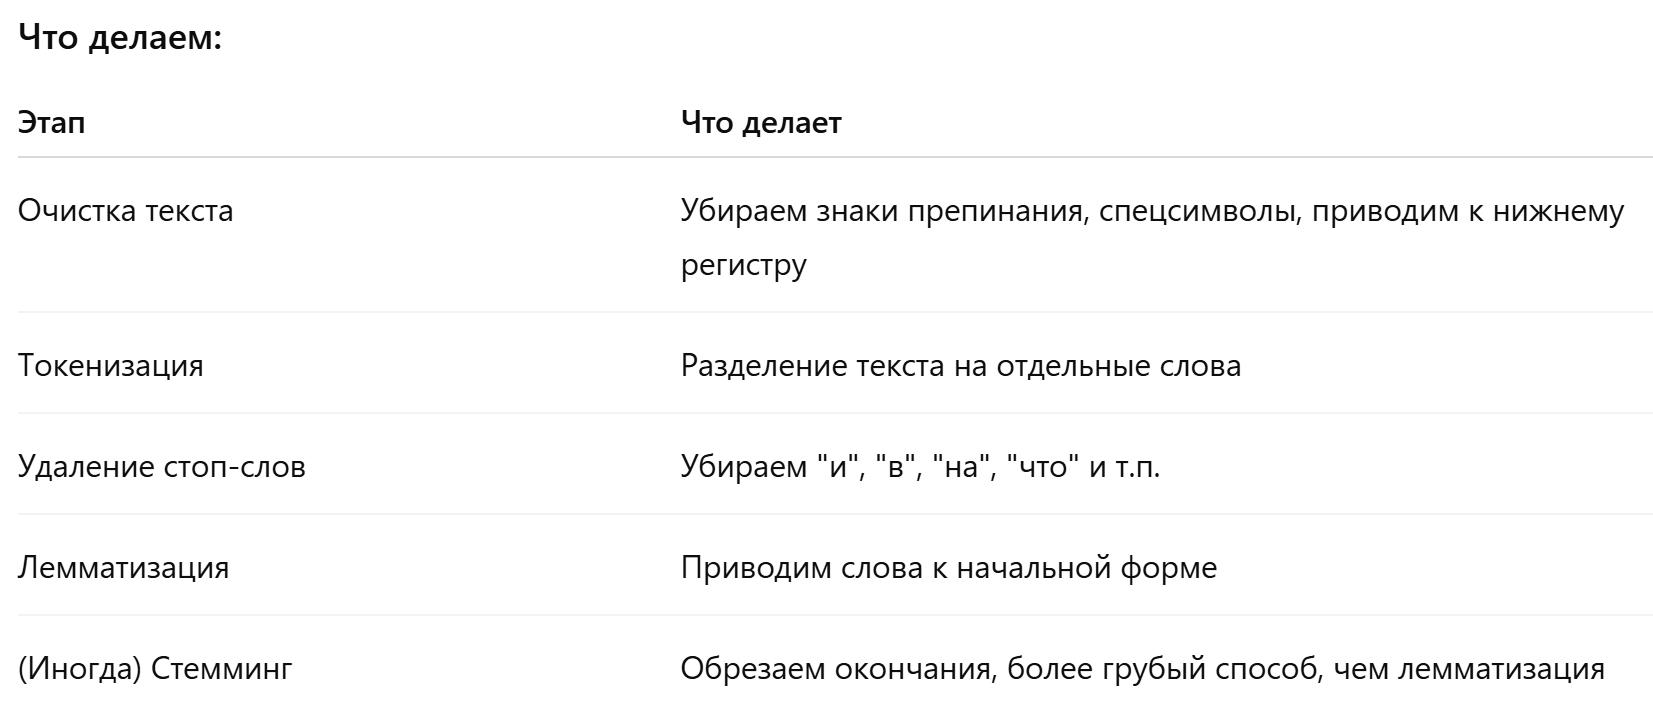

In [60]:
!pip install nltk
!pip install pymorphy3

In [61]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy3
import re

In [62]:
nltk.download('punkt_tab')
nltk.download('stopwords')

morph = pymorphy3.MorphAnalyzer()

text = "Собаки бегают по улице и лают на прохожих. Это было очень громко!"

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
morph = pymorphy3.MorphAnalyzer()

text = "Собаки бегают по улице и лают на прохожих. Это было очень громко!"

## Задание 7.1: Очистка текста

In [64]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Убираем пунктуацию
    return text

cleaned = clean_text(text)
print(cleaned)

собаки бегают по улице и лают на прохожих это было очень громко


## Задание 7.2: Токенизация

In [65]:
tokens = word_tokenize(cleaned, language='russian')
print(tokens)

['собаки', 'бегают', 'по', 'улице', 'и', 'лают', 'на', 'прохожих', 'это', 'было', 'очень', 'громко']


## Задание 7.3: Удаление стоп-слов

In [66]:
stop_words = set(stopwords.words('russian'))
filtered_tokens = [word for word in tokens if word not in stop_words]
print(filtered_tokens)

['собаки', 'бегают', 'улице', 'лают', 'прохожих', 'это', 'очень', 'громко']


## Задание 7.4: Лемматизация


In [67]:
lemmas = [morph.parse(word)[0].normal_form for word in filtered_tokens]
print(lemmas)

['собака', 'бегать', 'улица', 'лаять', 'прохожий', 'это', 'очень', 'громко']


# Применение обработки данных в задачах машинног обучения

## Задание: Обучить линейную регрессию для предсказания 'fare' и оценить качество модели

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

In [69]:
X = df_encoded.drop(['fare', 'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], axis=1, errors='ignore')
y = df_encoded['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратичная ошибка: {mse:.4f}")


Среднеквадратичная ошибка: 931.0035


In [70]:
# Минимум и максимум
print("Минимум fare:", df['fare'].min())
print("Максимум fare:", df['fare'].max())

# Среднее и медиана для понимания типичных значений
print("Среднее fare:", df['fare'].mean())
print("Медиана fare:", df['fare'].median())

# Можно посмотреть и описательную статистику по всем числовым столбцам
print(df['fare'].describe())


Минимум fare: 0.0
Максимум fare: 512.3292
Среднее fare: 32.204207968574636
Медиана fare: 14.4542
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64


In [71]:
rmse = np.sqrt(mse)
rmse

np.float64(30.512350611290685)

Если среднее значение fare около 30-50, а RMSE примерно 30 (корень из MSE), значит модель ошибается примерно на уровень средней цены — это пока не очень хорошо.

Если максимальная цена, например, 500 или больше, а большинство билетов — 10-50, то большая MSE может быть вызвана выбросами (очень дорогими и очень дешевыми билетами).

### Повторим обучение модели после обработки данных

In [72]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [73]:
df = sns.load_dataset('titanic')

# 2. Убираем строки с пропущенными значениями в 'age' и 'fare'
df = df[df['age'].notnull()]
df = df[df['fare'].notnull()]
df = df[df['age'] > 0]

# 3. Заполняем пропущенные значения в 'embarked'
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# 4. Кодируем категориальные признаки
df_encoded = pd.get_dummies(df, columns=['sex', 'embarked'], drop_first=True)

# 5. Удаляем ненужные текстовые и категориальные колонки
df_encoded = df_encoded.drop(columns=[
    'deck', 'embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'
], errors='ignore')

# 6. Нормализуем числовые признаки
scaler = MinMaxScaler()
df_encoded[['age', 'fare']] = scaler.fit_transform(df_encoded[['age', 'fare']])

X = df_encoded.drop('fare', axis=1)
y = df_encoded['fare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка после обработки: {mse:.4f}")

Среднеквадратичная ошибка после обработки: 0.0124


/tmp/ipython-input-73-877390656.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


In [74]:
# Минимум и максимум
print("Минимум fare:", df['fare'].min())
print("Максимум fare:", df['fare'].max())

# Среднее и медиана для понимания типичных значений
print("Среднее fare:", df['fare'].mean())
print("Медиана fare:", df['fare'].median())

# Можно посмотреть и описательную статистику по всем числовым столбцам
print(df['fare'].describe())

Минимум fare: 0.0
Максимум fare: 512.3292
Среднее fare: 34.694514005602244
Медиана fare: 15.7417
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: fare, dtype: float64


In [75]:
rmse = np.sqrt(mse)
rmse

np.float64(0.11139197908939756)

# Самостоятельное задание



1.   Выбрать датасет из https://github.com/mwaskom/seaborn-data и подгрузить его
2.   Выполнить по аналогии задания из модулей



 Модуль 1: Работа с пропущенными значениями

- `isnull().sum()` — считает, сколько пропущенных значений в каждом столбце.
- `fillna()` — заполняет пропуски заданным значением (средним, медианой).
- `dropna()` — удаляет строки или столбцы с пропусками.
- Копирование датафрейма — `df.copy()` чтобы не менять оригинал.

---

 Модуль 2: Очистка от выбросов

- IQR — межквартильный размах (Q3 - Q1), показывает разброс данных.
- Строки, выходящие за границы `Q1 - 1.5 * IQR` и `Q3 + 1.5 * IQR` считаются выбросами.
- Удаление выбросов — помогает сделать модель точнее.

---

 Модуль 3: Нормализация

- Машинные алгоритмы лучше работают, когда признаки примерно в одном масштабе.
- `MinMaxScaler` преобразует значения к диапазону `[0, 1]`.

---

 Модуль 4: Кодирование категориальных признаков

- Модели не понимают текст.
- `pd.get_dummies()` создаёт новые столбцы с 0 и 1, где была категория.
- Пример: `sex` → два столбца `sex_male`, `sex_female`.

---

 Модуль 5: Удаление дубликатов

- Иногда данные повторяются.
- `drop_duplicates()` удаляет повторяющиеся строки.

---

 Модуль 6: Приведение типов

- Для корректной работы функций нужно, чтобы числа были числами, а не строками.
- `astype(int)` меняет тип столбца.

---

 Модуль 7: Обработка текста

- Текст приводится к нижнему регистру — чтобы "Собака" и "собака" были одинаковы.
- Токенизация — разделение на слова.
- Удаление стоп-слов — убираем малоинформативные слова.
- Лемматизация — приводим слова к нормальной форме (собака, собаки → собака).
